In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MSSV = 21521413

In [3]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))

    return pop

In [4]:
# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[1 0 0 1]
 [0 0 0 0]
 [1 1 1 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 1 0]]


In [5]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

def leadingOnes( ind ):
    for i in range(len(ind)):
        if ind[i] == 0:
            return i
    return len(ind)

def concaternated_trap_K(ind, k=5):
  splitted_pop = [ind[i:i+k] for i in range(0, len(ind), k)]

  fitness_value = 0
  for part in splitted_pop:
    ones = sum(part)

    fitness_value += ones if ones == k else k - ones - 1
  return fitness_value





In [6]:
leadingOnes([1,0,1,0])

1

In [7]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

def tournament_selection(pop, pop_fitness, selection_size, tournament_size=4):
    num_individuals = len(pop)
    indices = np.arange(num_individuals)

    selected_indices = []
    while len(selected_indices) < selection_size:
        np.random.shuffle(indices)

        for i in range(0, num_individuals, tournament_size):
            bracket = indices[i:i + tournament_size]
            bracket_fitness = pop_fitness[bracket]

            winner_index = bracket[np.argmax(bracket_fitness)]
            selected_indices.append(winner_index)

            if len(selected_indices) == selection_size:
                break

    return selected_indices

def proportional_selection(pop, pop_fitness, selection_size):
    total_fitness = np.sum(pop_fitness)
    selection_probs = pop_fitness / total_fitness

    selected_indices = []
    while len(selected_indices) < selection_size:
        rand_num = np.random.rand()
        cumulative_prob = 0.0
        for i, prob in enumerate(selection_probs):
            cumulative_prob += prob
            if cumulative_prob > rand_num:
                selected_indices.append(i)
                break

    return selected_indices


In [8]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [9]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0

    return pop

In [10]:
def genetic_algorithm(objective, selection_method, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])

        offspring = crossover(pop)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)
        pool = np.vstack([pop, offspring])
        pool_fitness = np.concatenate((pop_fitness, offspring_fitness))

        selected_indices = selection_method( pool, pool_fitness, selection_size )
        pop = pool[selected_indices]
        pop_fitness = pool_fitness[selected_indices]

        if verbose:
            print(f'#Gen {i+1}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)


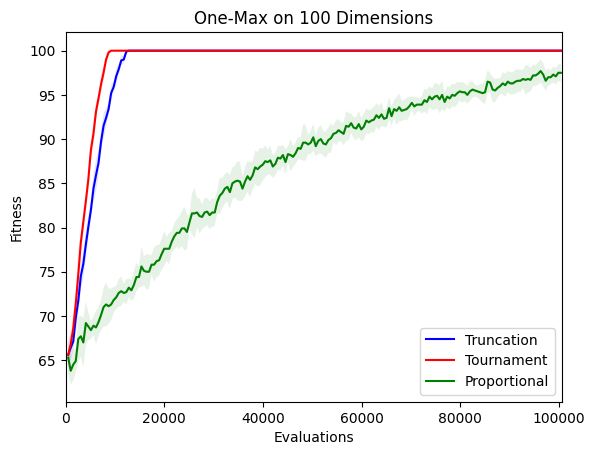

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n_trials = 10
num_parameters = 100
max_evaluations = 100000
num_individuals = 512 # population size

fits_truncation = []
fits_tournament = []
fits_proportional = []
evals = []

for i in range(n_trials):
    np.random.seed(MSSV + i)
    # Run GA with truncation selection
    pop_truncation, pop_fitness_truncation, best_fitness_truncation = genetic_algorithm(onemax, truncation_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_truncation = np.array(best_fitness_truncation)
    if i == 0:
        evals = best_fitness_truncation[:,0]
    fits_truncation.append(best_fitness_truncation[:,1])

    # Run GA with tournament selection
    pop_tournament, pop_fitness_tournament, best_fitness_tournament = genetic_algorithm(onemax, tournament_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_tournament = np.array(best_fitness_tournament)
    fits_tournament.append(best_fitness_tournament[:,1])

    # Run GA with proportional selection
    pop_proportional, pop_fitness_proportional, best_fitness_proportional = genetic_algorithm(onemax, proportional_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_proportional = np.array(best_fitness_proportional)
    fits_proportional.append(best_fitness_proportional[:,1])

# Calculate average and standard deviation of fitness values across trials for each selection method
avg_truncation = np.mean(fits_truncation, axis=0)
err_truncation = np.std(fits_truncation, axis=0)

avg_tournament = np.mean(fits_tournament, axis=0)
err_tournament = np.std(fits_tournament, axis=0)

avg_proportional = np.mean(fits_proportional, axis=0)
err_proportional = np.std(fits_proportional, axis=0)

# Plotting
plt.plot(evals, avg_truncation, label="Truncation", color='b')
plt.fill_between(evals, avg_truncation+err_truncation, avg_truncation-err_truncation, facecolor='b', alpha=0.1)

plt.plot(evals, avg_tournament, label="Tournament", color='r')
plt.fill_between(evals, avg_tournament+err_tournament, avg_tournament-err_tournament, facecolor='r', alpha=0.1)

plt.plot(evals, avg_proportional, label="Proportional", color='g')
plt.fill_between(evals, avg_proportional+err_proportional, avg_proportional-err_proportional, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend()
plt.show()


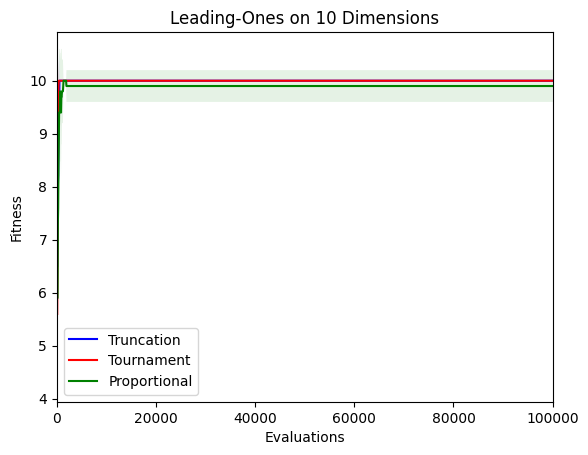

In [12]:
n_trials = 10
num_parameters = 10
max_evaluations = 100000
num_individuals = 64 # population size

fits_truncation = []
fits_tournament = []
fits_proportional = []
evals = []

for i in range(n_trials):
    np.random.seed(MSSV + i)
    # Run GA with truncation selection
    pop_truncation, pop_fitness_truncation, best_fitness_truncation = genetic_algorithm(leadingOnes, truncation_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_truncation = np.array(best_fitness_truncation)
    if i == 0:
        evals = best_fitness_truncation[:,0]
    fits_truncation.append(best_fitness_truncation[:,1])

    # Run GA with tournament selection
    pop_tournament, pop_fitness_tournament, best_fitness_tournament = genetic_algorithm(leadingOnes, tournament_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_tournament = np.array(best_fitness_tournament)
    fits_tournament.append(best_fitness_tournament[:,1])

    # Run GA with proportional selection
    pop_proportional, pop_fitness_proportional, best_fitness_proportional = genetic_algorithm(leadingOnes, proportional_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_proportional = np.array(best_fitness_proportional)
    fits_proportional.append(best_fitness_proportional[:,1])

# Calculate average and standard deviation of fitness values across trials for each selection method
avg_truncation = np.mean(fits_truncation, axis=0)
err_truncation = np.std(fits_truncation, axis=0)

avg_tournament = np.mean(fits_tournament, axis=0)
err_tournament = np.std(fits_tournament, axis=0)

avg_proportional = np.mean(fits_proportional, axis=0)
err_proportional = np.std(fits_proportional, axis=0)

# Plotting
plt.plot(evals, avg_truncation, label="Truncation", color='b')
plt.fill_between(evals, avg_truncation+err_truncation, avg_truncation-err_truncation, facecolor='b', alpha=0.1)

plt.plot(evals, avg_tournament, label="Tournament", color='r')
plt.fill_between(evals, avg_tournament+err_tournament, avg_tournament-err_tournament, facecolor='r', alpha=0.1)

plt.plot(evals, avg_proportional, label="Proportional", color='g')
plt.fill_between(evals, avg_proportional+err_proportional, avg_proportional-err_proportional, facecolor='g', alpha=0.1)


plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"Leading-Ones on {num_parameters} Dimensions")
plt.legend()
plt.show()


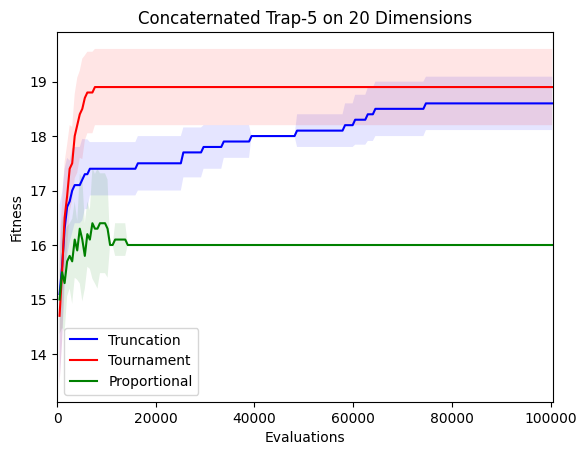

In [13]:

n_trials = 10
num_parameters = 20
max_evaluations = 100000
num_individuals = 512 # population size

fits_truncation = []
fits_tournament = []
fits_proportional = []
evals = []

for i in range(n_trials):
    np.random.seed(MSSV + i)
    # Run GA with truncation selection
    pop_truncation, pop_fitness_truncation, best_fitness_truncation = genetic_algorithm(concaternated_trap_K, truncation_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_truncation = np.array(best_fitness_truncation)
    if i == 0:
        evals = best_fitness_truncation[:,0]
    fits_truncation.append(best_fitness_truncation[:,1])

    # Run GA with tournament selection
    pop_tournament, pop_fitness_tournament, best_fitness_tournament = genetic_algorithm(concaternated_trap_K, tournament_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_tournament = np.array(best_fitness_tournament)
    fits_tournament.append(best_fitness_tournament[:,1])

    # Run GA with proportional selection
    pop_proportional, pop_fitness_proportional, best_fitness_proportional = genetic_algorithm(concaternated_trap_K, proportional_selection, num_individuals, num_parameters, max_evaluations)
    best_fitness_proportional = np.array(best_fitness_proportional)
    fits_proportional.append(best_fitness_proportional[:,1])

# Calculate average and standard deviation of fitness values across trials for each selection method
avg_truncation = np.mean(fits_truncation, axis=0)
err_truncation = np.std(fits_truncation, axis=0)

avg_tournament = np.mean(fits_tournament, axis=0)
err_tournament = np.std(fits_tournament, axis=0)

avg_proportional = np.mean(fits_proportional, axis=0)
err_proportional = np.std(fits_proportional, axis=0)

# Plotting
plt.plot(evals, avg_truncation, label="Truncation", color='b')
plt.fill_between(evals, avg_truncation+err_truncation, avg_truncation-err_truncation, facecolor='b', alpha=0.1)

plt.plot(evals, avg_tournament, label="Tournament", color='r')
plt.fill_between(evals, avg_tournament+err_tournament, avg_tournament-err_tournament, facecolor='r', alpha=0.1)

plt.plot(evals, avg_proportional, label="Proportional", color='g')
plt.fill_between(evals, avg_proportional+err_proportional, avg_proportional-err_proportional, facecolor='g', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"Concaternated Trap-5 on {num_parameters} Dimensions")
plt.legend()
plt.show()


# Nhận xét
Sau khi chạy thực nhiệm trên 3 hàm benchmark, có thể thấy Tournament Selection có vẻ là phép chọn lọc hiệu quả nhất do chỉ cần thực hiện dưới 20000 phép evaluations đã tìm được cá thể có độ nghi cao

- OneMax 100bit: Với population size là 512 thì cả Truncation và Tournament đều tìm ra cá thể có độ thích nghi 100, còn Proportional thì vẫn chưa tìm được với số lần gọi evaluations dưới 100.000

- LeadingOnes 10bit: Có lẽ là do 10 bit là khá ít nên chỉ với population size là 64 cả ba thuật toán đều có thể tìm ra cá thể với độ thích nghi là 10 chỉ sau vài thế hệ ( số lần gọi hàm evaluations rất ít )

- Concaternated Trap-5 20bit: Với population size là 512, Chỉ có Tournament Selection là tìm được cá thể với độ thích nghi 20 ( toàn bit 1 ), Truncation có trường hợp tìm được cá thể với độ thích nghi 19 (nhưng vẫn chưa tối ưu), còn Proportional có lẽ là tệ nhất, có lẽ do bị bias thiên về cá thể có fitness cao mà bỏ qua cá thể có fitness thấp nên bị mắc kẹt ở độ thích nghi 16 ( toàn bit 0 )